In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams.update({'font.size': 24})

# What is a stochastic process?

A stochastic process is a collection of random variables: 
{
X
t
,
t
∈
I
}
,
 Where: 
X
t
 is the set of random variables at time 
t
, and 
I
 is the index set of the process.

Discrete time stochastic processes which we will focus on in this tutorial are sequences of random variables.

Simulation of Gambler's Ruin
We can use the famous example of gambler's ruin which is a stochastic process.

In our case, a gambler starts off with $50. To keep things simple, they can only bet in increments of $1. They can only win or lose $1 per bet. They will keep gambling until they either lost all their money (leave with $0) or if they win $100. We can formalize this with the following notation:

  
(1)	
X
g
=
{
$+1,	with a probability of 50% $−1,	with a probability of 50% 
 

Where: 
X
g
 is the gambling outcome in dollars.

Source: [Introduction to Stochastic Processes with R](https://www.amazon.com/Introduction-Stochastic-Processes-Robert-Dobrow/dp/1118740653) by Robert P. Dobrow

In [3]:


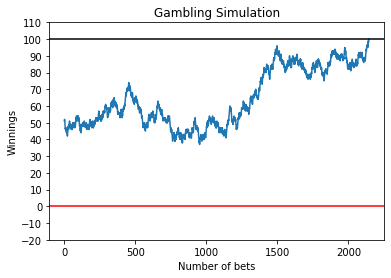

In [3]:
def gamblers_ruin():
  gambling_money = 50
  gambling_goal = 100
  gambling_simulation = []

  while gambling_money in range(1,gambling_goal):
    bet_size = 1
    w_or_l = random.randrange(-1, 2, step = 2)
    gambling_money += bet_size * w_or_l
    gambling_simulation.append(gambling_money)
  return gambling_simulation



plt.plot(gamblers_ruin())
plt.yticks(np.arange(-20,120,10))
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=100, color='black', linestyle='-')
plt.xlabel('Number of bets')
plt.ylabel('Winnings')
plt.title('Gambling Simulation');

In [4]:
def prob_of_ruin(gambling_goal, initial_gambling_money):
  return (gambling_goal - initial_gambling_money)/gambling_goal

prob_of_ruin(100,50)

0.5

In [5]:
sim_list = []

while len(sim_list) < 500:
  sim_list.append(gamblers_ruin()[-1])

np.mean(sim_list)

49.6

# Source: [Introduction to Stochastic Processes with R](https://www.amazon.com/Introduction-Stochastic-Processes-Robert-Dobrow/dp/1118740653) by Robert P. Dobrow

Markov Chains

A Markov chain is a type of stochastic process.

A Markov chain is a collection of random variables (
X
t
) where the future states (
j
) only depend on the current state (
i
). Markov chains can be either discrete or continuous.

For a Markov chain transition matrix (denoted as 
P
):

Each row must add to one, where:  	 
∑
j
P
i
j
=
1
.
The probabilities must be non-negative where: 
P
i
j
≥
0
 
 
∀
 
 
i
,
j
Source: [Introduction to Stochastic Processes with R](https://www.amazon.com/Introduction-Stochastic-Processes-Robert-Dobrow/dp/1118740653) by Robert P. Dobrow

Source: [Markov Chain](https://mathworld.wolfram.com/MarkovChain.html?utm_source=twitterfeed&utm_medium=twitter) from Wolfram MathWorld

Markov Chain Simulation

A Markov chain can be simulated from an initial distribution and transition matrix. In our case, the initial state is New York City. From the initial state we can travel to: Paris, Cairo, Seoul or even within New York City.

The transition matrix contains the one step transition probabilities of moving from state to state.

Source: [Introduction to Stochastic Processes with R](https://www.amazon.com/Introduction-Stochastic-Processes-Robert-Dobrow/dp/1118740653) by Robert P. Dobrow

# 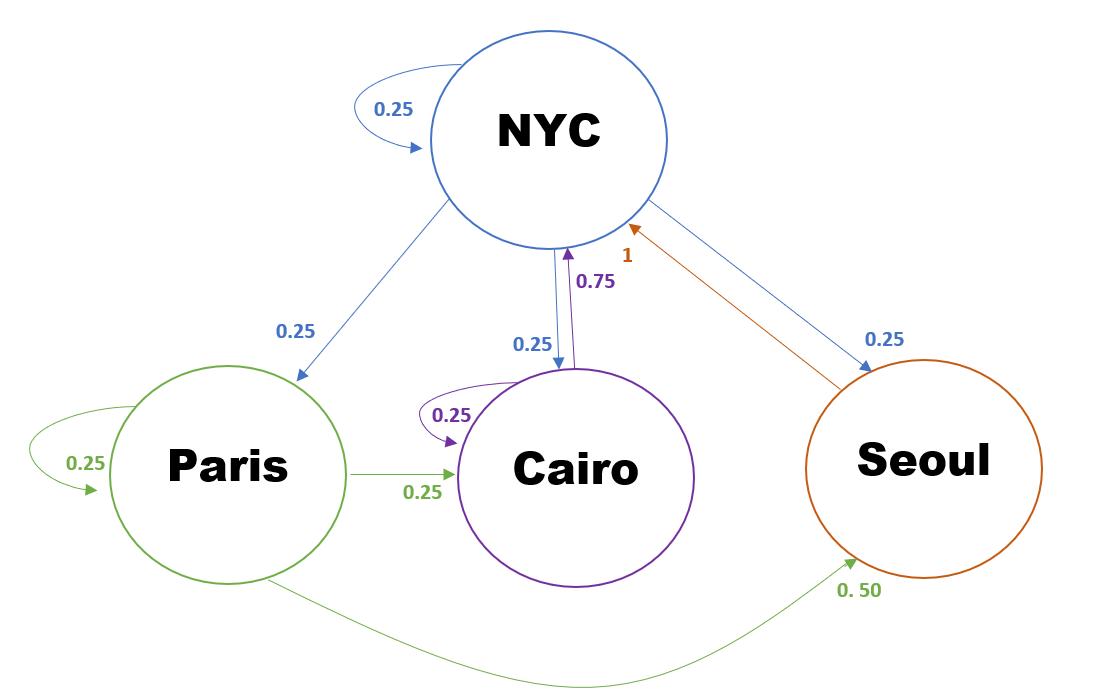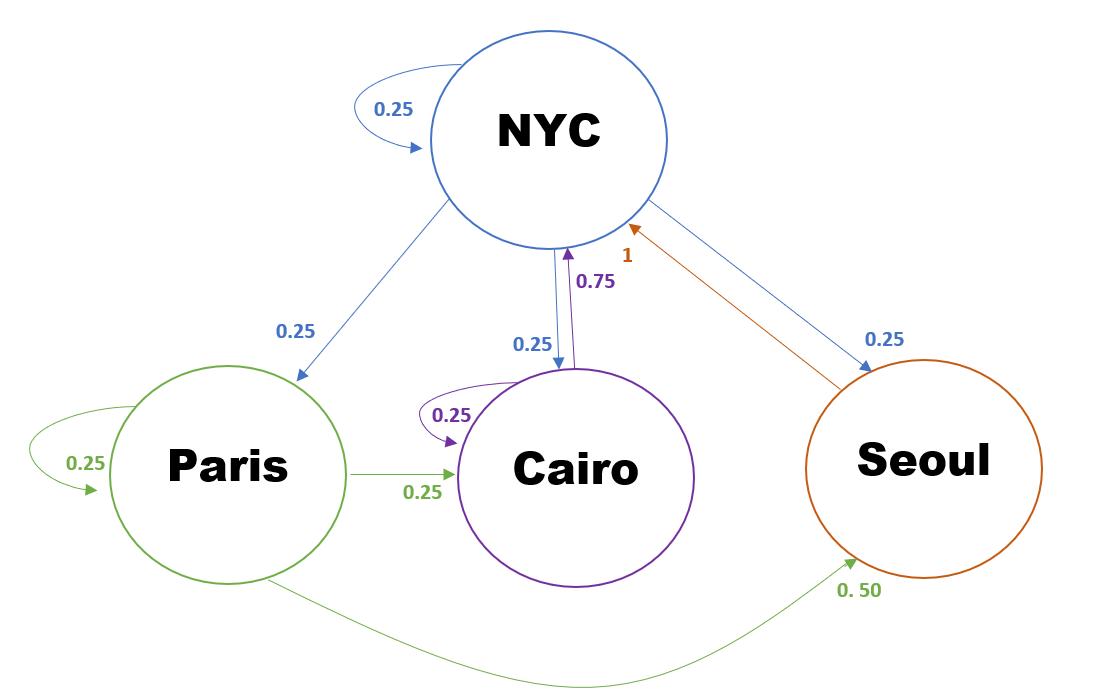

In [6]:
mc_example = {'NYC': [.25,0,.75,1],
              'Paris': [.25,.25,0,0],
              'Cairo': [.25,.25,.25,0],
              'Seoul': [.25,.5,0,0]}

mc = pd.DataFrame(data = mc_example, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])

travel_sim = []
travel_sim.append(mc.iloc[0].index[0])
city = np.random.choice(mc.iloc[0].index, p = mc.iloc[0])
travel_sim.append(city)

while len(travel_sim) < 25:
  city = np.random.choice(mc.iloc[mc.index.get_loc(city)].index, p = mc.iloc[mc.index.get_loc(city)])
  travel_sim.append(city)
    
    
travel_sim

['NYC',
 'NYC',
 'Seoul',
 'NYC',
 'Cairo',
 'NYC',
 'Cairo',
 'Cairo',
 'NYC',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'NYC',
 'Paris',
 'Cairo',
 'NYC',
 'NYC',
 'Paris',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC']

In [7]:
mc

,NYC,Paris,Cairo,Seoul
NYC,0.25,0.25,0.25,0.25
Paris,0.00,0.25,0.25,0.50
Cairo,0.75,0.00,0.25,0.00
Seoul,1.00,0.00,0.00,0.00


# Memorylessness: The future is independent of the past given the present

An important feature of Markov chains is that they are memorylessness. If we look at our example, the only state that matters is the current state. If our salesperson started in New York City (
X
0
=
N
Y
C
) and traveled to Paris (
X
1
=
P
a
r
i
s
), then the movement to the next city (
X
2
) only depends on the probabilities of travel from Paris. The fact that the salesperson originally started in New York does not effect the movement to 
X
2
.

n
 Step Transition Matrix

In [8]:
mc.to_numpy()

array([[0.25, 0.25, 0.25, 0.25],
       [0.  , 0.25, 0.25, 0.5 ],
       [0.75, 0.  , 0.25, 0.  ],
       [1.  , 0.  , 0.  , 0.  ]])

In [9]:
def matrix_power(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, matrix_power(matrix, power-1))

matrix_power(mc.to_numpy(), 2)

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

# What the above 2-step transition matrix is telling us is if we look at state 
i
 for New York, in two steps there is a 50% probability that the salesperson ends up back in New York City, a 12.5% probability that they go onto Paris and an 18.75% chance that they end up in Cairo or Seoul.

In [10]:
initial_dist = np.asarray([0,0,0,1])

mc_p2 = matrix_power(mc.to_numpy(),2)

np.dot(initial_dist,mc_p2)

array([0.25, 0.25, 0.25, 0.25])

# References and Additional Learning
Online Course

Introduction to Probability from MIT OpenCourseWare
Textbook

Introduction to Stochastic Processes with R by Robert P. Dobrow
Videos

Markov Chains by patrickJMT

Markov Steady-State Vectors by Brandon Foltz

Origin of Markov chains from Khan Academy Labs

Connect

Feel free to connect with Adrian on YouTube, LinkedIn, Twitter and GitHub. Happy coding!

In [11]:
for i in range(1,10,1):
  print(f'n Step Transition Matrix at the nth power {i}\n', matrix_power(mc.to_numpy(), i),'\n')

n Step Transition Matrix at the nth power 1
 [[0.25 0.25 0.25 0.25]
 [0.   0.25 0.25 0.5 ]
 [0.75 0.   0.25 0.  ]
 [1.   0.   0.   0.  ]] 

n Step Transition Matrix at the nth power 2
 [[0.5    0.125  0.1875 0.1875]
 [0.6875 0.0625 0.125  0.125 ]
 [0.375  0.1875 0.25   0.1875]
 [0.25   0.25   0.25   0.25  ]] 

n Step Transition Matrix at the nth power 3
 [[0.453125 0.15625  0.203125 0.1875  ]
 [0.390625 0.1875   0.21875  0.203125]
 [0.46875  0.140625 0.203125 0.1875  ]
 [0.5      0.125    0.1875   0.1875  ]] 

n Step Transition Matrix at the nth power 4
 [[0.453125   0.15234375 0.203125   0.19140625]
 [0.46484375 0.14453125 0.19921875 0.19140625]
 [0.45703125 0.15234375 0.203125   0.1875    ]
 [0.453125   0.15625    0.203125   0.1875    ]] 

n Step Transition Matrix at the nth power 5
 [[0.45703125 0.15136719 0.20214844 0.18945312]
 [0.45703125 0.15234375 0.20214844 0.18847656]
 [0.45410156 0.15234375 0.203125   0.19042969]
 [0.453125   0.15234375 0.203125   0.19140625]] 

n Step Trans